# 2020-11-16 Searching for an analytical form for the PSP

## Imports

In [1]:
from voltage_to_wiring_sim.support.notebook_init import *

Preloading:
 - numpy … (0.10 s)
 - matplotlib.pyplot … (0.20 s)
 - numba … (0.27 s)
 - unitlib … (0.01 s)

Importing from submodules (compiling numba functions) … ✔

Imported `np`, `mpl`, `plt`
Imported codebase (`voltage_to_wiring_sim`) as `v`
Imported `*` from `v.support.units`
Setup autoreload


In [2]:
# We use `v` for v(t) below.
vtws = v;

In [3]:
from sympy import *

## Problem statement

In [4]:
a, b, v_r, tau = symbols("a, b, v_r, tau")
v, u, g = symbols("v, u, g", cls=Function)
t = symbols("t", nonnegative=True);

In [5]:
eq_g = Eq(g(t), exp(-t/tau))

Eq(g(t), exp(-t/tau))

In [6]:
eq_v = Eq(Derivative(v(t), t),
          v(t)**2 - u(t) + g(t)*v(t)).subs(eq_g.lhs, eq_g.rhs)

Eq(Derivative(v(t), t), -u(t) + v(t)**2 + v(t)*exp(-t/tau))

In [7]:
eq_u = Eq(Derivative(u(t), t),
          a*(b*v(t)-u(t)))

Eq(Derivative(u(t), t), a*(b*v(t) - u(t)))

In [8]:
initial_conditions = {
    v(0): v_r,
    u(0): 0,
};

## Solve

In [9]:
%%time
sol = dsolve((eq_v, eq_u), ics=initial_conditions)

Wall time: 16.1 s


In [10]:
sol[0]

Eq(v(t), -v_r*x0(t)*y0(0)*exp(tau)*Integral(-exp(Integral(-a, t))*exp(Integral(exp(-t/tau), t))/x0(t)**2, t) + (-v_r*y0(0)*exp(tau)*Integral(exp(-a*t)*exp(-tau*exp(-t/tau))/x0(t)**2, (t, 0)) + v_r/x0(0))*x0(t))

In [11]:
sol[1]

Eq(u(t), -v_r*(y0(t)*Integral(-exp(Integral(-a, t))*exp(Integral(exp(-t/tau), t))/x0(t)**2, t) + exp(Integral(-a, t))*exp(Integral(exp(-t/tau), t))/x0(t))*y0(0)*exp(tau) + (-v_r*y0(0)*exp(tau)*Integral(exp(-a*t)*exp(-tau*exp(-t/tau))/x0(t)**2, (t, 0)) + v_r/x0(0))*y0(t))

## Examine 'solution'

In [12]:
v_sol = sol[0].rhs;

Concrete values for constants:

In [13]:
v_sol_1 = v_sol.subs(
    {(a, 1),
     (v_r, -1),
     (tau, 1)
    }).doit()

(E*y0(0)*Integral(exp(-t)*exp(-exp(-t))/x0(t)**2, (t, 0)) - 1/x0(0))*x0(t) - E*x0(t)*y0(0)*Integral(exp(-t)*exp(-exp(-t))/x0(t)**2, t)

In [14]:
x0, y0 = symbols("x0, y0", cls=Function)

$x_0(t)$ is a new unknown function.

We only have $y_0(0)$ (and not $y_0(t)$) in the solution for $v$, so $y_0(0)$ is simply a new free constant.

Set both to a constant:

In [15]:
%%time
v_sol_1_x0_ct = v_sol_1.subs(
    {(x0(0), 1),
     (x0(t), 1),
     (y0(0), -1)
    }).simplify()

-2 + E*exp(-exp(-t))

Evaluate and plot for a range of $t$'s:

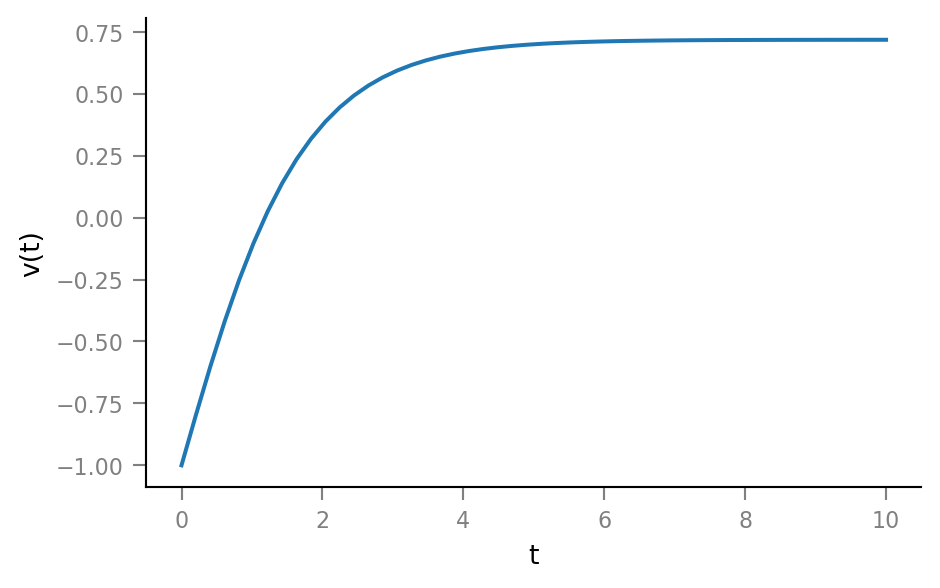

In [16]:
f = lambdify(t, v_sol_1_x0_ct)
ts = np.linspace(0, 10)
fig, ax = plt.subplots()
ax.plot(ts, f(ts))
ax.set(xlabel="t", ylabel="v(t)");

Not our PSP shape yet, so $x_0(t)$ is not a constant 1 :)


Choosing a function of $t$ for $x_0$ results in an expression that needs to be integrated numerically to be plotted:

In [17]:
%%time
v_sol_1_x0_exp = v_sol_1.subs(
    {(x0(0), 1),
     (x0(t), exp(-t)),
     (y0(0), -1)
    }).simplify()

-(-E*Integral(exp(t)*exp(-exp(-t)), t) + E*Integral(exp(t)*exp(-exp(-t)), (t, 0)) + 1)*exp(-t)

[WolframAlpha evaluation & plot](https://www.wolframalpha.com/input/?i=e%5E%28-t%29+*+%28%28int+e%5E%28t-e%5E%28-t%29%29%29+-+1%29)
(assuming that integral with 0 at the top is 0):

![](images/wolfram_alpha_PSP.png)

This is also not our PSP shape.

(the exponential integral:)
![](images/exponential_integral.png)

## Reproducibility info

In [18]:
vtws.print_reproducibility_info(verbose=True)

This cell was last run on **Mon 16 Nov** 2020, at 13:42 (UTC+0100),<br>by `tfiers` on `yoga`.

[Last git commit](https://github.com/tfiers/voltage-to-wiring-sim/tree/85b90e8f70a70d1c38a583b536ebc665af845e14
) (Fri 13 Nov 2020, 13:31).

Uncommited changes to:
```
AM notebooks/2020-11-11__unitlib.ipynb
?? notebooks/2020-11-16__no_analytical_PSP.ipynb
```

Platform:

CPython 3.8.3
Windows-10
Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz


Dependencies of `voltage_to_wiring_sim` and their installed versions:

numpy                1.19.2
matplotlib           3.3.2
numba                0.51.2
unitlib              0.3.post22+dirty
joblib               0.17.0
preload              2.1
py-cpuinfo           7.0.0


In [19]:
import sympy
sympy.__version__

'1.6.2'